<a href="https://colab.research.google.com/github/ssmirnov50/LW1/blob/main-1/%D0%A1%D0%B8%D0%A2%D0%98%D0%98_2_%D0%9B%D0%A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛР1 - Модели машинного обучения для классификации

Система обнаружения вторжений (СОВ, Intrusion Detection System, IDS) — это система, которая мониторит сетевой трафик на предмет подозрительной активности и выдает предупреждения при обнаружении такой активности. ПО, сканирующее сеть или систему на наличие вредоносной активности или нарушений политик. Любые злонамеренные действия или нарушения обычно сообщаются администратору или централизовано собираются с помощью SIEM. Система SIEM интегрирует данные из множества источников и произодит фильтрацию алертов для различения злонамеренной активности от ложных сработок.

<img src=https://www.temok.com/blog/wp-content/uploads/2020/10/network2.jpg width=600/>

Хостовая СОВ (Host-Based IDS, HIDS): HIDS развертывается на конкретном конечном устройстве и предназначена для защиты его от внутренних и внешних угроз. Такая система IDS может иметь возможность мониторить сетевой трафик, исходящий из машины и поступающий на нее, наблюдать за запущенными процессами и проверять системные журналы. Видимость системы обнаружения вторжений на основе хоста ограничена его хост-машиной, что снижает доступный контекст для принятия решений, но обеспечивает глубокое внутреннее видение компьютера хоста.

Система обнаружения вторжений на основе сети (NIDS): Решение NIDS предназначено для мониторинга всей защищаемой сети. Оно работает по всему трафика, проходящему через сеть, и принимает решения на основе метаданных пакетов и их содержимого. Более полный "обзор" обеспечивает больше контекста и возможность обнаружения широкомасштабных угроз, однако эти системы не имеют информации о внутренних процессах серверов/машин.

Методы обнаружения в IDS:
Метод на основе сигнатур: IDS на основе сигнатур обнаруживает атаки на основе конкретных шаблонов, таких как количество байтов или количество единиц или нулей в сетевом трафике. Он также обнаруживает на основе уже известной злонамеренной последовательности инструкций, используемой вредоносным программным обеспечением. Обнаруженные шаблоны в IDS известны как сигнатуры. IDS на основе сигнатур может легко обнаруживать атаки, чей шаблон (сигнатура) уже существует в системе, но плохо работает с новыми атаками, поскольку их шаблон (сигнатура) неизвестен. В машинном обучении это обучение с учителем, что и будет рассматриваться в данной ЛР

Метод на основе аномалий: IDS на основе аномалий был введен для обнаружения неизвестных вредоносных атак, поскольку новые вредоносные программы разрабатываются быстро. Машинное обучение в IDS на основе аномалий используется для запоминания образа "доверенной" активности, и все, что поступает, сравнивается с этой моделью, и объявляется подозрительным, если оно не найдено в модели. Метод на основе машинного обучения имеет лучшее обобщающее свойство по сравнению с IDS на основе сигнатур, поскольку эти модели могут быть обучены в соответствии с приложениями и конфигурациями оборудования. В машинном обучении это обучение без учителя.

---

## Импорты

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

## Разведка данных

In [ ]:
# Read Train and Test dataset
data_train = pd.read_parquet(r'/content/drive/MyDrive/СиТИИ/СиТИИ 2/labeled_data/data_example.parquet')

In [ ]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125972 non-null  int32   
 1   protocol_type                125972 non-null  category
 2   service                      125972 non-null  category
 3   flag                         125972 non-null  category
 4   src_bytes                    125972 non-null  int32   
 5   dst_bytes                    125972 non-null  int32   
 6   land                         125972 non-null  int8    
 7   wrong_fragment               125972 non-null  int8    
 8   urgent                       125972 non-null  int8    
 9   hot                          125972 non-null  int8    
 10  num_failed_logins            125972 non-null  int8    
 11  logged_in                    125972 non-null  int8    
 12  num_compromised              125972 non-null

In [ ]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480801,4021285.112114,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
data_train['label'] = data_train['label'].astype(str)

In [ ]:
data_train.loc[data_train['label'] == "normal", "label"] = 'normal'
data_train.loc[data_train['label'] != 'normal', "label"] = 'attack'

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

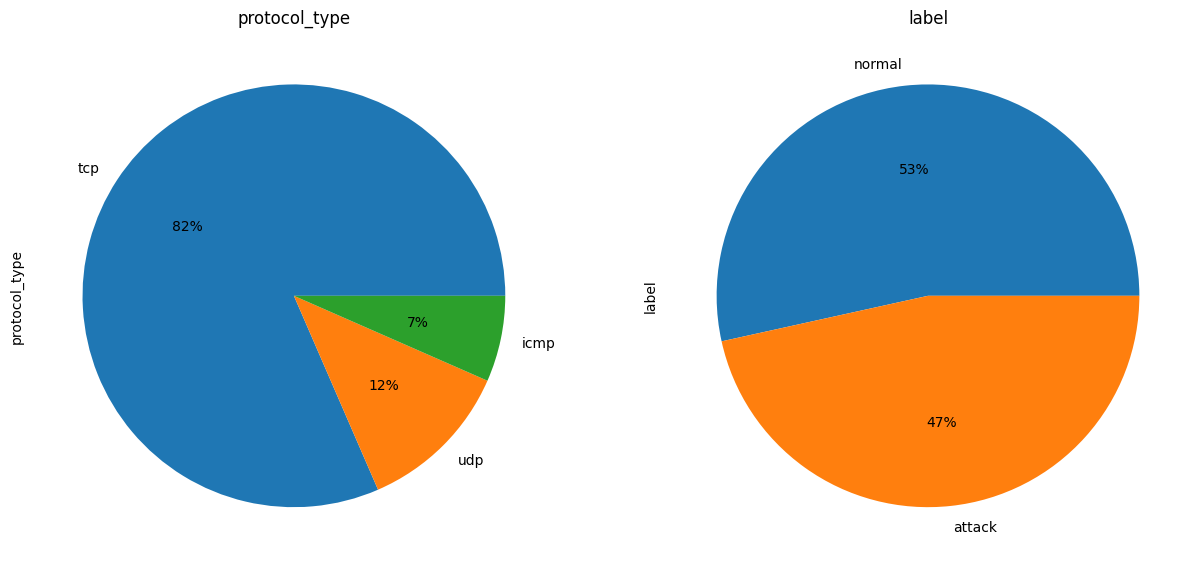

In [ ]:
pie_plot(data_train, ['protocol_type', 'label'], 1, 2)

## Предобработка данных

In [ ]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [ ]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'label']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['label'] == "normal", "label"] = 0
    dataframe.loc[dataframe['label'] != 0, "label"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [ ]:
scaled_train = preprocess(data_train)

## Моделирование
Процесс моделирования означает обучение алгоритма машинного обучения прогнозированию меток объектов, настройку его в соответствии с потребностями бизнеса и проверку его на несогласованных данных. Результатом моделирования является обученная модель, которую можно использовать для логического вывода, делая прогнозы по новым точкам данных.

<img src="https://docs.microsoft.com/en-us/windows/ai/images/winml-model-flow.png" width="600"/>

Модель машинного обучения сама по себе представляет собой файл, который был обучен распознавать определенные типы шаблонов. Вы обучаете модель на наборе данных, формируя ее на основе определенного алгоритма, и благодаря этому она приобретает некоторые веса или иные числовые значения, отражающие характеристики данных.
После того, как вы обучили модель, вы можете использовать ее для анализа данных, которые она раньше не видела, и делать прогнозы на основе этих данных.

## Метрики качества

### Accuracy, Precision, Recall

Эти метрики используются для оценки эффекивности классификационных моделей. Они помогают понять, насколько хорошо модель предсказывает правильные ответы на обрабатываемых объектах. Ответом модели в задаче классификации является класс (метка класса), к которой принадлежит некий объект, поданный на вход модели в виде числового вектора.

#### 1. Accuracy (Точность)

Accuracy — это самая интуитивно понятная метрика, измеряющая долю правильных предсказаний из всех предсказаний. Она не нацелена на какой-то конретный класс. Формула для accuracy:

$$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Population}} $$

где:
- True Positives (TP) — количество правильно классифицированных положительных случаев,
- True Negatives (TN) — количество правильно классифицированных отрицательных случаев,
- Total Population — общее количество случаев.

#### 2. Precision (Точность предсказания)

Precision отражает, какая доля объектов, отнесенных к положительному классу, действительно относится к нему. Формула для precision:

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

где False Positives (FP) — это количество неправильно классифицированных отрицательных случаев как положительные.

#### 3. Recall (Полнота)

Recall показывает, какая доля объектов положительного класса была обнаружена классификатором. Формула для recall:

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

где False Negatives (FN) — это количество положительных случаев, неправильно классифицированных как отрицательные.

#### Матрица ошибок

Матрица ошибок (Confusion Matrix) — это инструмент, используемый в машинном обучении для визуализации производительности алгоритма классификации. Матрица представляет собой таблицу, которая позволяет легко увидеть сравнение между фактическими и прогнозируемыми значениями. Это особенно полезно в задачах бинарной или многоклассовой классификации.

Для бинарной классификации матрица ошибок обычно выглядит следующим образом:

<img src="https://t1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/4SKt/image/VwzVj8EgnrXLgUcZcs_seAUWEQg.png" width="600"/>

В скобках будет приведено пояснение на примере системы обнаружения вредоносных пакетов (условно IDS).

* True Positive (TP): количество объектов, классифицированных как принадлежащие к классу 1, истинно принадлежащих классу 1 (верно найденные опасные пакеты).
* True Negative (TN): количество объектов, классифицированных как 0, истинно принадлежащих классу 0  (верно пропущенные легитимные пакеты).
* False Positive (FP): количество объектов, классифицированных как 1, но на самом деле принадлежащих классу 0 (легитимные пакеты, неверно названные опасными).
* False Negative (FN): количество объектов, классифицированных как 0, но на самом деле принадлежащих классу 1 (пропущенные опасные пакеты).

#### Важность

- **Accuracy** полезна, когда классы сбалансированы, но может быть вводящей в заблуждение для несбалансированных классов.
- **Precision** важна, когда стоимость False Positives высока (например, в ИБ).
- **Recall** критична, когда стоимость False Negatives высока (например, в медицинской диагностике).

Часто между precision и recall существует компромисс, и выбор метрики зависит от специфики задачи. Этот компромисс олицетворяет, например, метрика F1 Score.


**На картинках ниже (желто-фиолетовых) функция evaluate_classification рисует именно матрицу ошибок.**


In [ ]:
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals = dict()
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print(f"Точность обучения {name} {train_accuracy*100:.2f}  Точность теста {name} {test_accuracy*100:.2f}")
    print(f"Точность предсказания {name} {train_precision*100:.2f}  Точность предсказания на тесте {name} {test_precision*100:.2f}")
    print(f"Полнота обучения {name} {train_recall*100:.2f}  Полнота на тесте {name} {test_recall*100:.2f}")


    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

## Логистическая регрессия
Логистическая регрессия, также известная как модель логит, часто используется в классификации и предиктивной аналитике. Этот тип статистической модели позволяет оценить вероятность наступления события, например, проголосовал ли человек или нет, на основе набора независимых переменных. Поскольку результатом является вероятность, зависимая переменная находится в пределах от 0 до 1. В логистической регрессии применяется логит-преобразование, то есть вероятность успеха делится на вероятность неудачи. Это также известно как логарифм шансов или натуральный логарифм шансов, и логистическая функция представлена следующей формулой:

${\displaystyle f(z)={\frac {1}{1+e^{-z}}}.}$

В уравнении логистической регрессии h является зависимой или откликающей переменной, а x — независимой переменной. Параметр бета или коэффициент в этой модели обычно оценивается с помощью метода максимального правдоподобия (MLE). Этот метод проверяет различные значения бета через множество итераций для оптимизации наилучшего соответствия логарифма шансов. Все эти итерации создают функцию логарифмического правдоподобия, и логистическая регрессия стремится максимизировать эту функцию для нахождения наилучшей оценки параметра. Как только оптимальный коэффициент (или коэффициенты, если независимых переменных более одной) найден, можно рассчитать условные вероятности для каждого наблюдения, залогарифмировать и суммировать их для получения предсказанной вероятности. Для бинарной классификации вероятность меньше 0,5 предсказывает 0, а вероятность больше 0 предсказывает 1. После вычисления модели важно оценить, насколько хорошо модель предсказывает зависимую переменную, что называется качеством подгонки.

#### Бинарная логистическая регрессия

В этом подходе зависимая или откликающая переменная имеет два возможных исхода (например, 0 или 1). Некоторые популярные примеры ее использования включают предсказание, является ли электронное письмо спамом или нет, или определение, является ли опухоль злокачественной. В рамках логистической регрессии это наиболее часто используемый подход, и, в более широком смысле, один из наиболее распространенных классификаторов для бинарной классификации.

#### Многозначная логистическая регрессия

В этом типе модели логистической регрессии зависимая переменная имеет три или более возможных исходов, которые не упорядочены. Например, кинопродюсеры могут захотеть предсказать, какой жанр фильма скорее всего выберет зритель, чтобы более эффективно рекламировать фильмы. Многозначная логистическая регрессия может помочь определить, насколько возраст, пол и семейное положение человека могут повлиять на его предпочтения в кино. Затем студия может нацелить рекламную кампанию конкретного фильма на группу людей, которые, как ожидается, пойдут его смотреть.

Training Accuracy Logistic Regression 87.97443861198488  Test Accuracy Logistic Regression 87.62452867632466
Training Precesion Logistic Regression 83.81338426160502  Test Precesion Logistic Regression 83.56894553881807
Training Recall Logistic Regression 91.85621836355482  Test Recall Logistic Regression 91.60809552036582


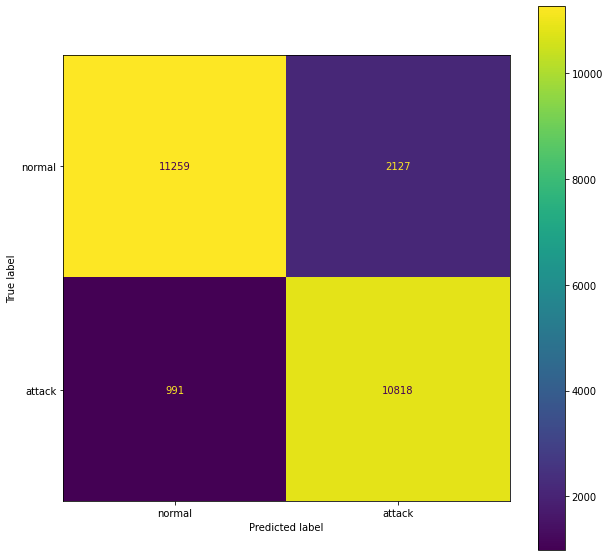

In [ ]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

##  k ближайших соседей, или KNN (k-nearest neighbors)

Алгоритм k-ближайших соседей, также известный как KNN, представляет собой непараметрический классификатор с контролируемым обучением, который использует близость для создания классификаций или прогнозов относительно группировки отдельной точки данных. Хотя он может быть использован как для задач регрессии, так и для задач классификации, обычно он используется в качестве алгоритма классификации, основанного на предположении, что похожие точки могут быть найдены рядом друг с другом.

<img src=https://i.imgur.com/LZzmAwz.png width=500/>

### Определение метрик расстояния

Чтобы определить, какие точки данных находятся ближе всего к заданной точке, необходимо рассчитать расстояние между целевой точкой и другими точками из данных. Эти показатели расстояния помогают сформировать границы принятия решения, которые разделяют точки на разные регионы. Можно представить границы принятия решений визуально с помощью диаграммы Вороного.

Для расчета различных видов расстояний между векторами $ \mathbf{a} $ и $ \mathbf{b} $ в пространстве $ \mathbb{R}^n $, где $ n $ обозначает размерность пространства, используются следующие формулы.

1. **Евклидово расстояние** между двумя точками определяется как квадратный корень из суммы квадратов разностей их соответствующих координат. Формула для евклидова расстояния между $ \mathbf{a} $ и $ \mathbf{b} $ выглядит следующим образом:
$$ d_{\text{евклид}}(\mathbf{a}, \mathbf{b}) = \sqrt{\sum_{i=1}^{n} (a_i - b_i)^2} $$

2. **Манхэттенское расстояние**, также известное как расстояние городских кварталов, между двумя точками определяется как сумма абсолютных разностей их соответствующих координат. Формула для манхэттенского расстояния между $ \mathbf{a} $ и $ \mathbf{b} $ выглядит так:
$$ d_{\text{манхэттен}}(\mathbf{a}, \mathbf{b}) = \sum_{i=1}^{n} |a_i - b_i| $$

3. **Косинусное расстояние** используется для измерения углового расхождения между двумя векторами в многомерном пространстве, игнорируя их магнитуду. Косинусное расстояние между $ \mathbf{a} $ и $ \mathbf{b} $ определяется как $1$ минус косинус угла между этими векторами. Формула для косинусного расстояния выглядит как:
$$ d_{\text{косинус}}(\mathbf{a}, \mathbf{b}) = 1 - \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|} $$
где $ \mathbf{a} \cdot \mathbf{b} $ обозначает скалярное произведение векторов $ \mathbf{a} $ и $ \mathbf{b} $, а $ \|\mathbf{a}\| $ и $ \|\mathbf{b}\| $ — их евклидовы нормы, т.е., $\|\mathbf{a}\| = \sqrt{\mathbf{a} \cdot \mathbf{a}}$ и $\|\mathbf{b}\| = \sqrt{\mathbf{b} \cdot \mathbf{b}}$.

Визуализация метрик расстояния в двумерном пространстве признаков $ \{{x, y}\} $:

<img src = https://dhd2016.de/abstracts/0010-1.png width=500/>

Пример диаграммы Вороного:

<img src = https://i.stack.imgur.com/Dn3r4.png width=500/>

Training Accuracy KNeighborsClassifier 99.05236313841452  Test Accuracy KNeighborsClassifier 98.93629688430245
Training Precesion KNeighborsClassifier 99.22512234910276  Test Precesion KNeighborsClassifier 99.05636317266003
Training Recall KNeighborsClassifier 98.73133850195424  Test Recall KNeighborsClassifier 98.67050554661698


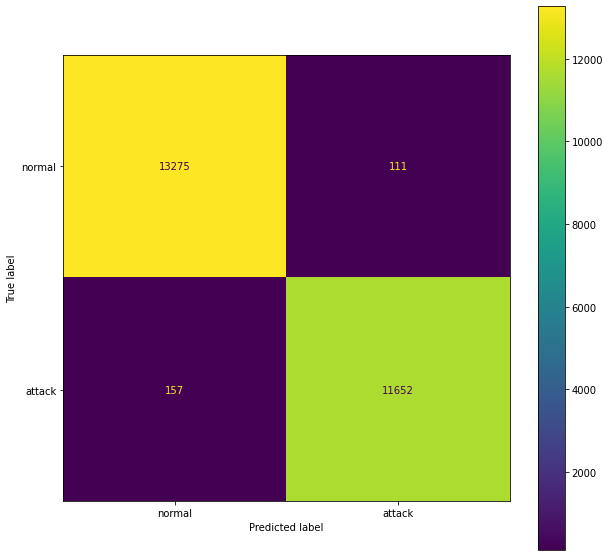

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

## Наивный Байес
Наивные байесовские классификаторы представляют собой набор алгоритмов классификации, основанных на теореме Байеса. Это не единый алгоритм, а семейство алгоритмов, где все они имеют общий принцип. Каждая пара классифицируемых признаков независима от других.
Предположения, сделанные наивной Байесовской моделью нельзя назвать полностью отражающими реальные ситуации. Предположение о независимости признаков в целом никогда не бывает правильным, но имеет обобщающую способность, что позволяет этим моделям хорошо работать на практике.

### Теорема Байеса

Теорема Байеса определяет вероятность наступления события, учитывая вероятность другого события, которое уже произошло. Теорема Байеса математически сформулирована в виде следующего уравнения:

<img src = https://hands-on.cloud/wp-content/uploads/2022/01/Implementing-Naive-Bayes-Classification-using-Python.png width=600/>


$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$

где:
- $P(A|B)$ — условная вероятность события $A$ при условии, что событие $B$ произошло,
- $P(B|A)$ — условная вероятность события $B$ при условии, что событие $A$ произошло,
- $P(A)$ — априорная (безусловная) вероятность события $A$,
- $P(B)$ — априорная (безусловная) вероятность события $B$.

Модель наивного Байеса — это простой вероятностный классификатор, основанный на применении теоремы Байеса с "наивным" предположением о независимости между признаками. Несмотря на свою простоту, наивный байесовский классификатор может работать лучше, чем другие, более сложные классификационные методы, особенно в случаях с малым объемом данных или когда предположение о независимости не сильно нарушено.

## Как работает наивный байесовский классификатор

1. **Предположение о независимости**: Наивный байесовский классификатор предполагает, что эффект любого признака на данное классификационное решение независим от эффектов других признаков. Это упрощение делает вычисления гораздо более управляемыми, но является "наивным", отсюда и название.

2. **Применение теоремы Байеса**: Для классификации объекта модель вычисляет вероятность того, что объект принадлежит к каждому из возможных классов, на основе признаков объекта. Это делается путем применения теоремы Байеса для каждого класса, чтобы пересчитать априорную вероятность класса в апостериорную вероятность, учитывая наблюдаемые признаки объекта.

### Формулировка

Для объекта с признаками $X = (x_1, x_2, ..., x_n)$ и классами $C_k$, вероятность того, что объект принадлежит к классу $C_k$, рассчитывается как:

$$ P(C_k|X) = \frac{P(X|C_k)P(C_k)}{P(X)} $$

где:
- $P(C_k|X)$ — апостериорная (условная) вероятность класса $C_k$ при условии признаков $X$,
- $P(X|C_k)$ — вероятность признаков $X$ при условии класса $C_k$, которая, в силу наивного предположения о независимости, вычисляется как произведение вероятностей каждого признака $x_i$ для класса $C_k$,
- $P(C_k)$ — априорная вероятность класса $C_k$,
- $P(X)$ — вероятность признаков $X$, обычно рассматривается как константа для всех классов и не влияет на классификацию.

### Применение

Модель выбирает класс $C_k$ с наивысшей апостериорной (условной) вероятностью $P(C_k|X)$ для данного объекта. Наивный байесовский классификатор особенно хорошо подходит для задач классификации текстов, таких как фильтрация спама и анализ тональности, где признаки (например, частоты слов) могут считаться довольно независимыми в контексте каждого класса.


Training Accuracy GaussianNB 91.80269307480874  Test Accuracy GaussianNB 91.60547727723754
Training Precesion GaussianNB 92.62657528189256  Test Precesion GaussianNB 92.53246753246754
Training Recall GaussianNB 89.47907990004485  Test Recall GaussianNB 89.29629943263613


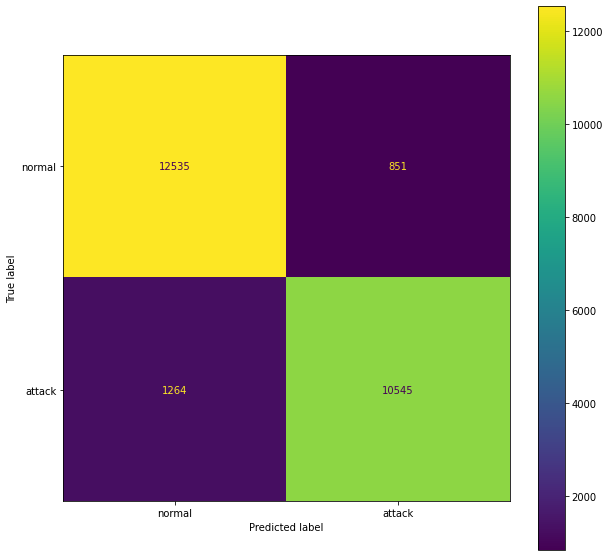

In [ ]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

## Метод опорных векторов
Метод опорных векторов (SVM, от англ. Support Vector Machine) — это мощный и гибкий класс алгоритмов машинного обучения, используемый для задач классификации и регрессии. SVM стремится найти гиперплоскость (или набор гиперплоскостей) в многомерном пространстве, которая наилучшим образом разделяет данные на классы.

### Основная идея

Основная идея SVM заключается в максимизации ширины отступа (margin) между классами. Отступ (или зазор) — это расстояние между гиперплоскостью, разделяющей классы, и ближайшими к этой плоскости точками данных (опорными векторами). Цель состоит в том, чтобы найти такую гиперплоскость, которая максимизирует ширину отступа, обеспечивая наилучшее разделение между классами.

### Формулировка задачи

Для двухклассовой классификации, где метки классов обозначены через $y_i \in \{-1, 1\}$, и каждому объекту $x_i$ сопоставлена метка $y_i$, SVM ищет решение задачи оптимизации:

$$ \min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i $$

при условиях:

$$ y_i(w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad i=1, \ldots, n, $$

где $w$ — вектор весов, $b$ — смещение, $\xi_i$ — переменные, измеряющие ошибку для каждого объекта, а $C$ — параметр регуляризации, контролирующий компромисс между максимизацией ширины отступа и минимизацией количества ошибочных классификаций.

<img src=https://habrastorage.org/r/w1560/webt/n-/5u/gy/n-5ugyyyqejoobj9javfcxaycpk.png width=600/>

### Ядра SVM

В случаях, когда данные не линейно разделимы в исходном пространстве, SVM использует так называемые ядра, позволяющие эффективно производить вычисления в пространствах высокой размерности без необходимости явного отображения данных в эти пространства. Ядерные функции (kernel functions) позволяют измерять сходство между объектами в пространстве высокой размерности, используя лишь исходные данные. Распространенными типами ядер являются линейное, полиномиальное, радиально-базисное (RBF) и сигмоидальное.

#### Линейное ядро
Линейное ядро — это самый простой тип ядра, используемый для линейной классификации. Формула линейного ядра:
$$ K(x, x') = x^T x' $$
где $x$ и $x'$ — два вектора признаков. Это ядро просто вычисляет скалярное произведение между двумя векторами в исходном признаковом пространстве.

#### Полиномиальное ядро
Полиномиальное ядро позволяет модели лучше улавливать взаимосвязи между признаками за счет добавления полиномиальных характеристик в пространство признаков. Формула:
$$ K(x, x') = (\gamma x^T x' + r)^d $$
где $\gamma$ — коэффициент масштаба, $r$ — независимый член, а $d$ — степень полинома.

#### Радиально-базисное ядро (RBF)
Радиально-базисное функциональное ядро, или просто RBF-ядро, является одним из наиболее популярных и универсальных ядер, используемых в SVM. Оно определяется как:
$$ K(x, x') = \exp(-\gamma \|x - x'\|^2) $$
где $\gamma$ — параметр, который определяет ширину "пика" ядра. RBF-ядро эффективно преобразует исходное пространство в бесконечномерное пространство, позволяя эффективно разделять данные, которые не разделимы в исходном пространстве.

#### Сигмоидальное ядро
Сигмоидальное ядро, иногда называемое гиперболическим тангенсом, имитирует использование нейронных сетей и определяется как:
$$ K(x, x') = \tanh(\gamma x^T x' + r) $$
где $\gamma$ — коэффициент масштаба, а $r$ — независимый член. Хотя сигмоидальное ядро может быть полезно в определенных контекстах, его использование может привести к некоторым трудностям, например, к отсутствию положительной определенности.


### Применение

SVM широко используется в таких областях, как распознавание образов, анализ текста и биоинформатика, благодаря своей способности к эффективной классификации даже в случаях, когда размерность данных значительно превышает количество образцов.

In [ ]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

Training Accuracy Linear SVC(LBasedImpl) 97.48454508469194  Test Accuracy Linear SVC(LBasedImpl) 97.28914467156183
Training Precesion Linear SVC(LBasedImpl) 97.85399377593362  Test Precesion Linear SVC(LBasedImpl) 97.54700854700855
Training Recall Linear SVC(LBasedImpl) 96.70660601012366  Test Recall Linear SVC(LBasedImpl) 96.64662545516131


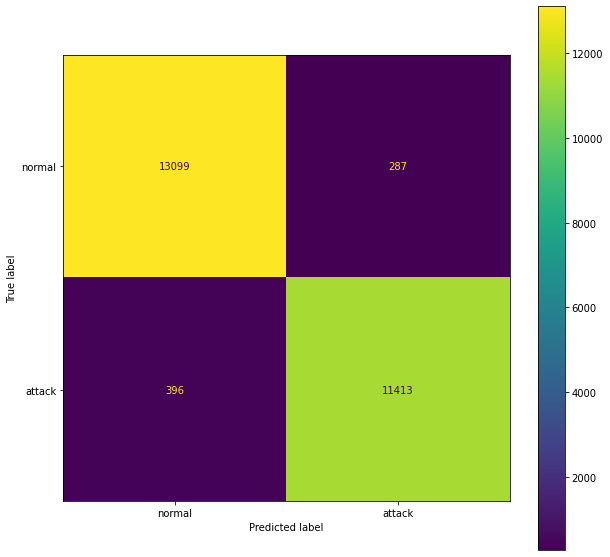

In [ ]:
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

## Решающее дерево (decision Tree)

Дерево решений — это один из самых мощных и популярных инструментов для классификации и прогнозирования. Дерево решений представляет собой структуру, похожую на блок-схему, где каждый внутренний узел обозначает проверку атрибута, каждая ветвь представляет собой результат проверки, а каждый листовой узел (конечный узел) содержит метку класса.

Дерево можно "обучить", разделив исходный набор на подмножества на основе некого порогового значения атрибута. Этот процесс повторяется для каждого полученного подмножества рекурсивным способом, называемым рекурсивным разбиением. Рекурсия завершается, когда подмножество в узле имеет одинаковое значение целевой переменной, или когда дальнейшее разбиение не приносит дополнительной ценности для прогнозов.
Деревья решений классифицируют экземпляры, направляя их вниз по дереву от корня к какому-либо листовому узлу, который предоставляет классификацию экземпляра. Классификация экземпляра начинается с корневого узла дерева (сверху то есть), проверяется атрибут, указанный этим узлом, затем перемещение вниз по ветви дерева в соответствии со значением атрибута, как показано на рисунке выше. Этот процесс затем повторяется для поддерева, начинающегося с нового узла.

Представим дерево решений глубиной $2$, построенное после обучения на данных с двумя признаками: $a$ и $b$. В первом узле идет разделение по признаку $b$ ($b \le 0.02$). На втором уровне те объекты, у которых $b \le 0.02$, разделяются теперь по условию $a \le -0.52$. А те объекты, у которых $b > 0.02$, разделяются по условию $a \le 1.462$.

<img src= https://i.stack.imgur.com/QKmhZ.png width=500/>

Training Accuracy DecisionTreeClassifier 99.99404626055548  Test Accuracy DecisionTreeClassifier 99.86902163127604
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.84761259735862
Training Recall DecisionTreeClassifier 99.98718523739348  Test Recall DecisionTreeClassifier 99.87297823693793


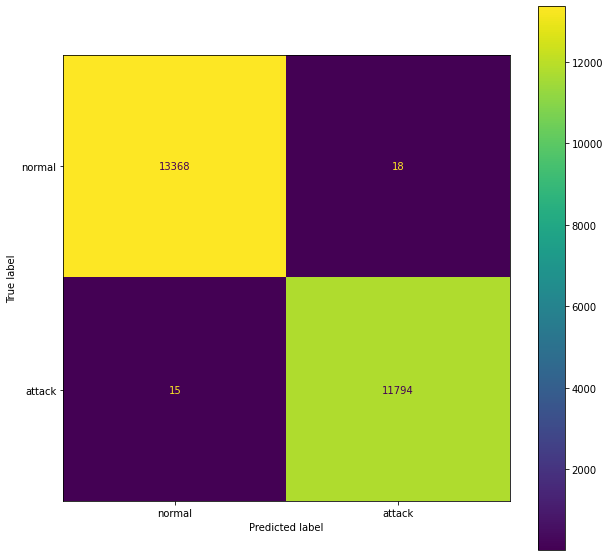

In [ ]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

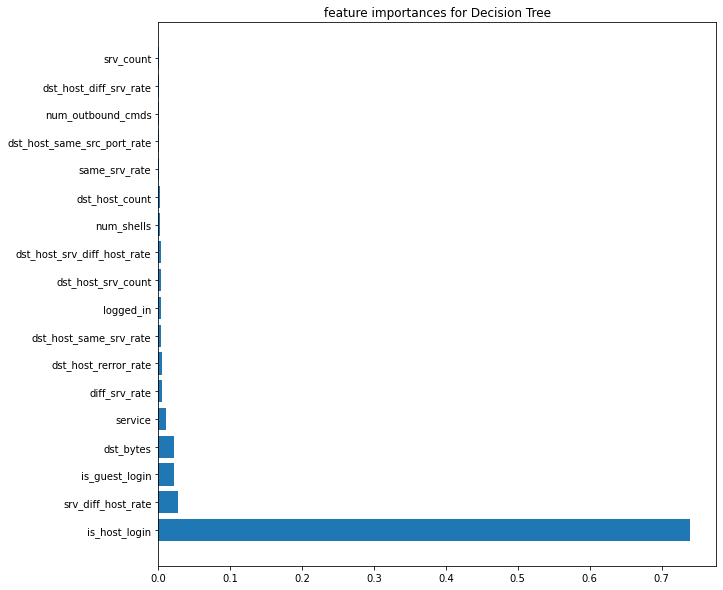

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

[Text(0.5, 0.875, 'X[5] <= -0.056\ngini = 0.497\nsamples = 100777\nvalue = [53956, 46821]'),
 Text(0.25, 0.625, 'X[65] <= 0.5\ngini = 0.149\nsamples = 46560\nvalue = [3778, 42782]'),
 Text(0.125, 0.375, 'X[6] <= 0.005\ngini = 0.061\nsamples = 43088\nvalue = [1358, 41730]'),
 Text(0.0625, 0.125, 'gini = 0.031\nsamples = 42229\nvalue = [661, 41568]'),
 Text(0.1875, 0.125, 'gini = 0.306\nsamples = 859\nvalue = [697, 162]'),
 Text(0.375, 0.375, 'X[30] <= -0.211\ngini = 0.422\nsamples = 3472\nvalue = [2420, 1052]'),
 Text(0.3125, 0.125, 'gini = 0.021\nsamples = 1033\nvalue = [11, 1022]'),
 Text(0.4375, 0.125, 'gini = 0.024\nsamples = 2439\nvalue = [2409, 30]'),
 Text(0.75, 0.625, 'X[56] <= 0.5\ngini = 0.138\nsamples = 54217\nvalue = [50178, 4039]'),
 Text(0.625, 0.375, 'X[9] <= 0.5\ngini = 0.066\nsamples = 51813\nvalue = [50032, 1781]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 49719\nvalue = [49043, 676]'),
 Text(0.6875, 0.125, 'gini = 0.498\nsamples = 2094\nvalue = [989, 1105]'),
 Te

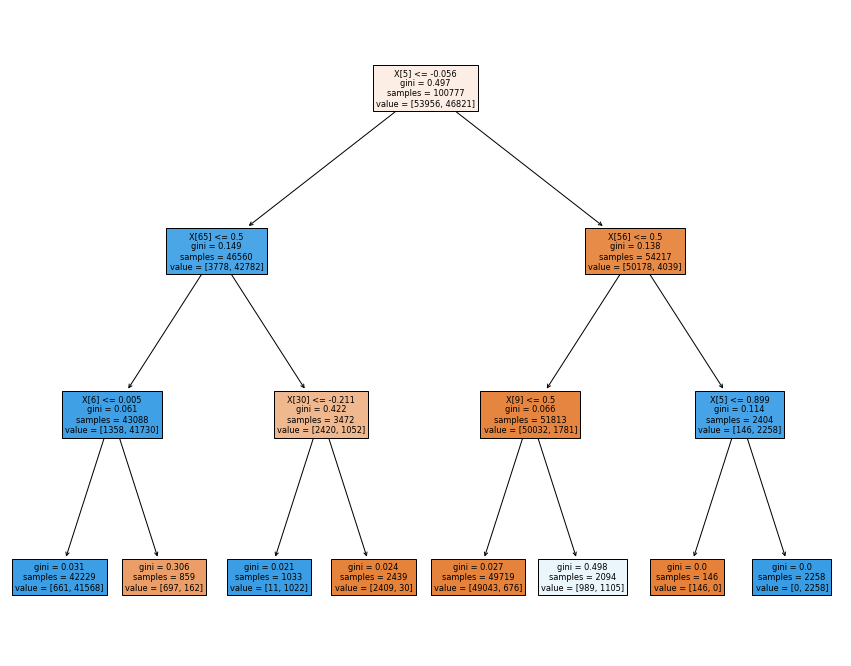

In [ ]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

## Random forest

<img src=https://www.researchgate.net/publication/354354484/figure/fig4/AS:1080214163595269@1634554534720/Illustration-of-random-forest-trees.jpg width=600/>

Алгоритм "Случайный лес" (Random Forest) представляет собой метод ансамблевого обучения, который используется для задач классификации, регрессии и других. Он строится на основе множества деревьев решений, обученных на различных подвыборках обучающего набора данных, и использует усреднение для улучшения точности прогнозирования и контроля переобучения.

### Как работает Случайный лес:
Создание подвыборок данных: Из исходного набора данных создаются множественные подвыборки с помощью метода бутстрапа (выборки с возвращением), что означает, что одни и те же данные могут появляться несколько раз в одной подвыборке.

* Построение деревьев решений: Для каждой подвыборки строится дерево решений. В процессе построения каждого дерева, на каждом шаге разбиения выбирается случайный набор признаков, и лучшее разбиение находится только среди этих признаков, а не среди всех возможных. Это увеличивает разнообразие среди деревьев в лесу.

* Голосование за прогноз: Для задач классификации - каждое дерево в лесу голосует за класс, и класс с наибольшим числом голосов становится предсказанием леса. То есть выбирается ответ, который дало наибольшее количество деревьев в модели леса. Для задач регрессии - результат предсказания получается путем усреднения ответов всех деревьев.

#### Преимущества:
* Высокая точность: Случайный лес может достигать высокой точности классификации и регрессии на многих наборах данных, поскольку ансамбль деревьев уменьшает риск переобучения на одном дереве.

* Устойчивость к переобучению: Благодаря методам бутстрапа и случайному выбору признаков, случайный лес лучше справляется с переобучением по сравнению с одиночными деревьями решений.

* Важность признаков: Случайный лес может предоставить оценки важности признаков, что является полезным инструментом для понимания того, какие признаки вносят наибольший вклад в прогноз.

* Гибкость: Может быть использован как для задач классификации, так и для регрессии.

#### Недостатки:
* Модель может быть довольно большой: Набор из сотен или тысяч деревьев может потреблять значительное количество памяти и быть относительно медленным для предсказаний.

* Сложность интерпретации: По сравнению с одним деревом решений, ансамбль из множества деревьев может быть сложнее интерпретировать.

Training Accuracy RandomForestClassifier 99.99404626055548  Test Accuracy RandomForestClassifier 99.87695971422902
Training Precesion RandomForestClassifier 99.9914571898426  Test Precesion RandomForestClassifier 99.9321688994404
Training Recall RandomForestClassifier 99.99572841246449  Test Recall RandomForestClassifier 99.80523329663816


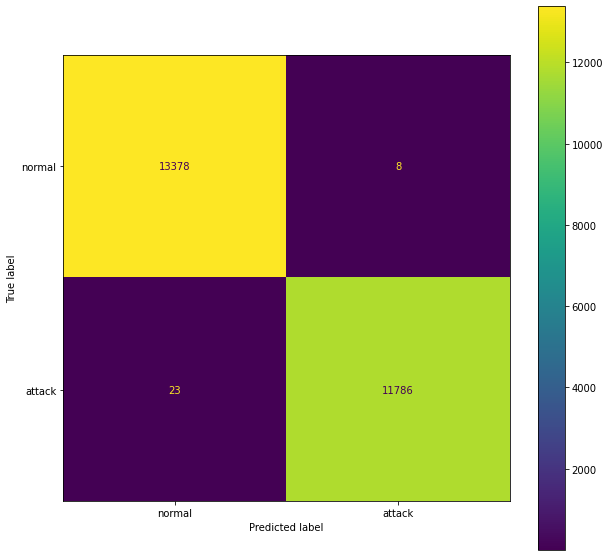

In [ ]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

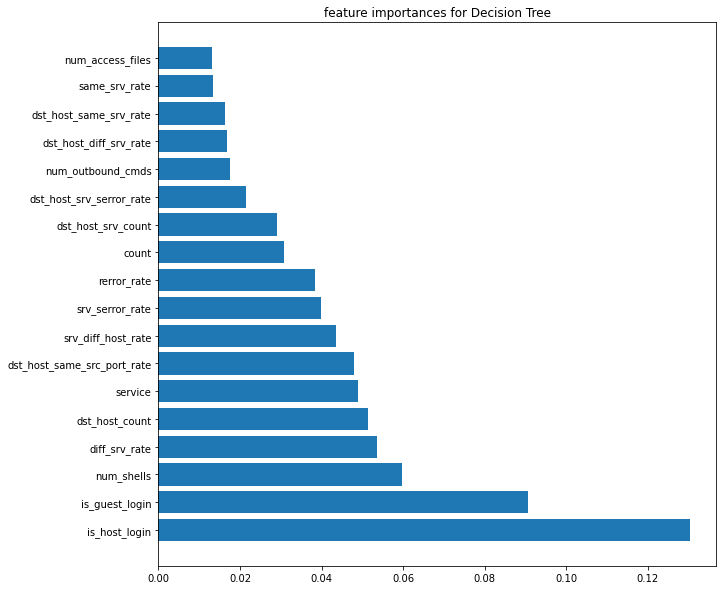

In [ ]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

## Регуляризация в машинном обучении

Регуляризация — это методика, применяемая для предотвращения переобучения моделей машинного обучения. Это достигается за счет добавления штрафа к величине коэффициентов модели, что ведет к более простым моделям и улучшает их способность к обобщению на новых данных.

### Применение регуляризации:

Регуляризация применяется во множестве алгоритмов машинного обучения, включая линейную и логистическую регрессию, нейронные сети и др. Оптимальное значение $\lambda$ и выбор типа регуляризации обычно находятся с помощью кросс-валидации.


### Виды регуляризации:

1. **L1-регуляризация (Лассо регрессия):**

   Добавляет к функции стоимости штраф, равный абсолютной сумме коэффициентов.
   $$ \text{L1}: \text{Cost Function} + \lambda \sum_{j=1}^{n} |w_j| $$

2. **L2-регуляризация (Ридж регрессия):**

   Добавляет к функции стоимости штраф, равный сумме квадратов коэффициентов.
   $$ \text{L2}: \text{Cost Function} + \lambda \sum_{j=1}^{n} w_j^2 $$

3. **Elastic Net:**

   Комбинирует L1 и L2 регуляризации, что особенно полезно при наличии множества коррелирующих признаков.
   $$ \text{Elastic Net}: \text{Cost Function} + \rho \lambda \sum_{j=1}^{n} |w_j| + \frac{1-\rho}{2} \lambda \sum_{j=1}^{n} w_j^2 $$

### Значение параметров:

- $\lambda$ — параметр регуляризации, контролирующий силу штрафа.
- $\rho$ — параметр, балансирующий влияние L1 и L2 регуляризаций в Elastic Net.

### Преимущества регуляризации:

- Помогает предотвратить переобучение, ограничивая сложность модели.
- Улучшает обобщающую способность модели на новых данных.
- L1-регуляризация может использоваться для отбора признаков, поскольку она может обнулить коэффициенты менее значимых признаков.

### Иллюстрация переобучения (того, с чем борется регуляризация)
<img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1473020/images/7929180/pasted-from-clipboard.png" width="600"/>

## Кросс-валидация в машинном обучении

Кросс-валидация — это статистический метод, используемый для оценки способности модели к обобщению на независимый набор данных. Этот метод особенно полезен в ситуациях, когда объем данных ограничен, и целью является минимизация ошибки на тестовом наборе данных.

### Основные типы кросс-валидации:

1. **k-кратная кросс-валидация (k-fold cross-validation):**

   Данные разделяются на k одинаковых (или почти одинаковых) блоков. Модель обучается на k-1 блоках данных, а оставшийся блок используется для тестирования. Процесс повторяется k раз, каждый раз с разным блоком в качестве тестового набора.
   $$ \text{CV}_k = \frac{1}{k} \sum_{i=1}^{k} \text{Accuracy}_i $$

2. **Оставить-один-выходом (Leave-One-Out (LOO) cross-validation):**

   Это частный случай k-кратной кросс-валидации, где k равно количеству наблюдений в наборе данных. То есть, для n наблюдений, модель обучается n раз, каждый раз используя все данные, кроме одного наблюдения, которое используется в качестве теста.
   $$ \text{LOO-CV} = \frac{1}{n} \sum_{i=1}^{n} \text{Error}_i $$


### Иллюстрация кросс-валидации

<img src="https://avatars.mds.yandex.net/i?id=ce35c5ae328793a186f71d6b629681fd0fa29915-5239137-images-thumbs&n=13" width="600"/>

### Преимущества кросс-валидации:

- **Надежная оценка производительности**: Позволяет лучше оценить, как модель будет работать на независимом наборе данных, поскольку каждый экземпляр данных используется и для обучения, и для тестирования.

- **Уменьшение влияния случайности**: Поскольку каждое наблюдение используется для тестирования, результаты менее зависимы от того, как именно данные были разделены на обучающую и тестовую выборки.

### Недостатки:

- **Высокая вычислительная стоимость**: Особенно для больших наборов данных или моделей с длительным временем обучения, поскольку требуется обучать и тестировать модель множество раз.

- **Не всегда подходит для временных рядов**: Для данных, где порядок наблюдений имеет значение (например, временные ряды), требуются специальные методы кросс-валидации, учитывающие временную структуру данных.


## Анализ основных компонентов

Анализ основных компонент, или PCA (Principal Component Analysis), - это статистический метод преобразования данных высокой размерности в данные низкой размерности путем выбора наиболее важных объектов данных, которые содержат максимум информации о наборе данных. Объекты выбираются на основе различий, которые они вызывают в выходных данных. Признак, "объясняющий" наибольшую дисперсию, является первым основным компонентом. Признак, отвечающий за вторую по величине дисперсию, считается вторым основным компонентом и так далее. Важно отметить, что основные компоненты не имеют никакой корреляции друг с другом.

<img src = https://hands-on.cloud/wp-content/uploads/2022/02/Implementing-Principal-component-analysis-PCA-using-Python.png width = "600"/>

#### Преимущества PCA

Существует два основных преимущества уменьшения размерности с помощью PCA.

* Время обучения алгоритмов значительно сокращается при меньшем количестве функций.
* Не всегда возможно анализировать данные в больших размерах. Например, если в наборе данных 100 объектов. Общее количество точечных диаграмм, необходимых для визуализации данных, составит 100(100-1)2 = 4950. Практически невозможно проанализировать данные таким образом.

In [ ]:
x = scaled_train.drop(['label', 'level'] , axis = 1).values
y = scaled_train['label'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print(f"Количество оригинальных признаков равно {x.shape[1]}, а уменьшенных признаков равно {x_reduced.shape[1]}")

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Количество оригинальных признаков равно 122, а уменьшенных признаков равно 20
